<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Laboratorios_Taller/Lab08_Derivadas_e_integrales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sc
import sympy as sp
from scipy.interpolate import lagrange
from scipy.interpolate import CubicSpline

#Parte 1

En un cirtcuito con un voltaje de  $\varepsilon(t)$ y una inductancia de L, la primera ley de kirshhoff nos da la siguiente relación

\begin{equation}
\varepsilon(t) = L\frac{\mathrm{d}i}{\mathrm{d}t} + Ri
\end{equation}

donde $R$, es la resistencia del ciruito, $I$ es la corriente. Suponga que medimos la corriente con varios valores de $t$ y obtenemos:

``t = 1.00, 1.01, 1.02, 1.03, 1.04``

``i = 3.10, 3.12, 3.14, 3.18, 3.24``


donde $t$ se mide en segundos, $I$ se da en Amperios, la inductancia $L$ es una constante de 0.98 H, la resistencia es de 0.142 $\Omega$. Aproxime el votaje  $\varepsilon(t)$ en los valores t=1.00, 1.01, 1.02, 1.03, 1.04 ,  para ello realice lo siguiente:


- Construya un data frame de pandas con los valores de tiempo y corriente
- Emplee un metodo calcular la derivada numérica.

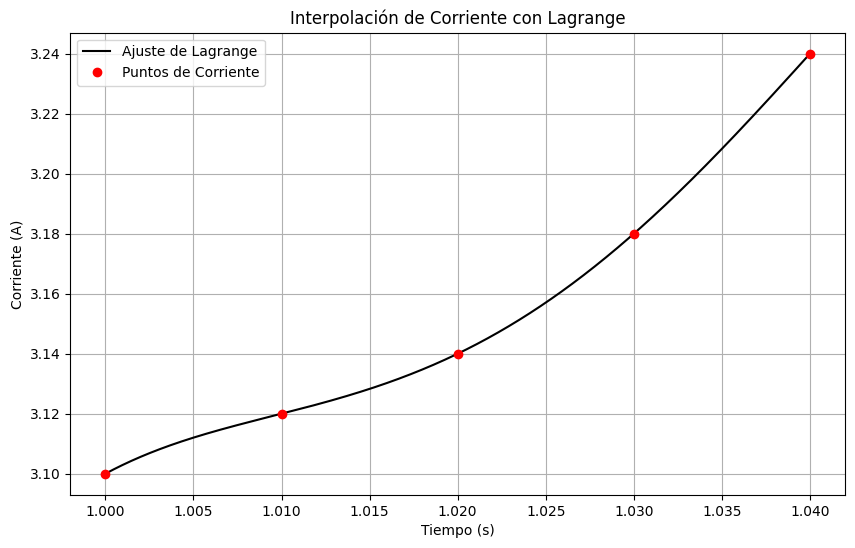

In [11]:
t = np.array([1.00, 1.01, 1.02, 1.03, 1.04])
i = np.array([3.10, 3.12, 3.14, 3.18, 3.24])

data = {"Tiempo (s)": t, "Corriente (A)": i}
df = pd.DataFrame(data)

# Calcular la derivada numérica de la corriente
derivada = np.gradient(i, t)

# Parámetros del circuito
L = 0.98
R = 0.142

E_t = L * derivada + R * i
df["fem (V)"] = E_t

# Ajuste de interpolación polinómica utilizando Lagrange
PL = lagrange(t, i)

xL = np.linspace(min(t), max(t), 1000)

plt.figure(figsize=(10, 6))
plt.plot(xL, PL(xL), "k-", label="Ajuste de Lagrange")
plt.plot(t, i, "ro", label="Puntos de Corriente")
plt.grid(True)
plt.legend()
plt.xlabel("Tiempo (s)")
plt.ylabel("Corriente (A)")
plt.title("Interpolación de Corriente con Lagrange")
plt.show()


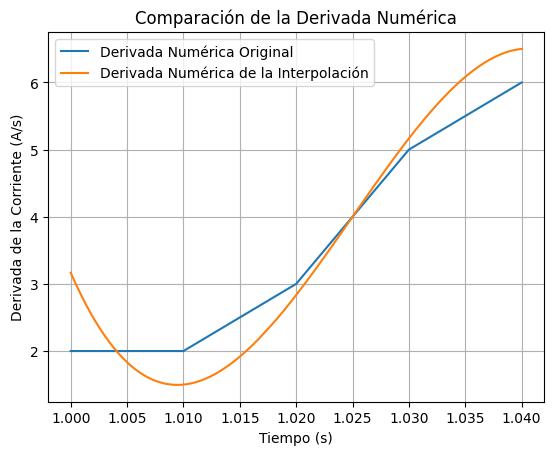

In [12]:
# Calcular la derivada numérica de la interpolación
h = 1e-6
f_prima = (1 / (2 * h)) * (-3 * PL(xL) + 4 * PL(xL + h) - PL(xL + 2 * h))

plt.plot(df["Tiempo (s)"], derivada, label="Derivada Numérica Original")
plt.plot(xL, f_prima, label="Derivada Numérica de la Interpolación")
plt.xlabel("Tiempo (s)")
plt.ylabel("Derivada de la Corriente (A/s)")
plt.title("Comparación de la Derivada Numérica")
plt.legend()
plt.grid()
plt.show()


##**Parte 2**

1. Escribir en código Markdown la expresión para calcular una integral con la regla del trapecio.

2. Escribir en código Markdown la expresión para calcular una integral con la regla del simpson.

3. Escribir en código Markdown la expresión para calcular una integral con el metodo de cuadratura.

4. Calcular una aproximación con el metodo 1,2,3 de las siguientes integrales

---
$$
 \int_0^{\pi/2} \frac{1}{\sqrt{\tan x}}\mathrm{dx}
 $$

----
$$
 \int_{1}^{\infty} \frac{\cos x}{x^3}\mathrm{dx}
 $$


----

$$
 \int_{0}^{\pi/4} \int_{0}^{\sin x} \frac{1}{\sqrt{1-y^2}}\mathrm{dxdy}
 $$

---

Garantizando  que el error sea menor a $\varepsilon=1\times 10^{-5}$.

## SOLUCIÓN

1. La expresión para calcular una integral utilizando la regla del trapecio se puede escribir de la siguiente manera:

$\frac{h}{2} \left( f(x_0) + 2 \sum_{i=1}^{n-1} f(x_i) + f(x_n) \right)$


Donde:
- \( h \) es el tamaño del intervalo de integración.
- \( f(x) \) es la función a integrar.
- \( x0 \) y \( xn \) son los límites de integración.
- \( xi \) son los puntos de integración dentro del intervalo.



2. La expresión para calcular una integral utilizando la regla de Simpson se puede escribir de la siguiente manera:


$\frac{h}{3} \left( f(x_0) + 4\sum_{i=1}^{n/2} f(x_{2i-1}) + 2\sum_{i=1}^{n/2-1} f(x_{2i}) + f(x_n) \right)$

Donde:
- \( h \) es el tamaño del intervalo de integración.
- \( f(x) \) es la función a integrar.
- \( x0 \) y \( xn \) son los límites de integración.
- \( xi \) son los puntos de integración dentro del intervalo, con \( xi_impares \) representando los puntos de integración impares y \( xi_pares \) representando los puntos de integración pares.

3. La expresión para calcular una integral utilizando el método de cuadratura se puede escribir de la siguiente manera:


$\sum_{i=1}^{n} w_i \cdot f(x_i)$


Donde:
- \( wi \) son los pesos asociados a cada punto de integración.
- \( xi \) son los puntos de integración.
- \( f(x) \) es la función a integrar.


In [13]:
import numpy as np
from scipy.integrate import quad, trapz, simps

def f1(x):
    return 1 / np.sqrt(np.tan(x))

def f2(x):
    return np.cos(x) / (x ** 3)

def f3(y, x):
    return 1 / np.sqrt(1 - y ** 2)

def integral_exterior(x):
    return quad(lambda y: f3(y, x), 0, np.sin(x), limit=500)[0]

# Límites de integración
a1, b1 = 0.1, np.pi / 2
a2, a3, b3 = 1, 0, np.pi / 4
b2 = 1e6  # Límite superior grande para la integral 2

# Aproximaciones de las integrales utilizando diferentes métodos
resultado_trapecio1 = trapz(f1(np.linspace(a1, b1, 100)), np.linspace(a1, b1, 100))
resultado_simpson1 = simps(f1(np.linspace(a1, b1, 100)), np.linspace(a1, b1, 100))
resultado_cuadratura1, _ = quad(f1, a1, b1)

resultado_trapecio2 = trapz(f2(np.linspace(a2, 10, 10000)), np.linspace(a2, 10, 10000))
resultado_simpson2 = simps(f2(np.linspace(a2, 10, 10000)), np.linspace(a2, 10, 10000))
resultado_cuadratura2, _ = quad(f2, a2, np.inf, limit=500)

resultado_cuadratura3 = quad(integral_exterior, a3, b3, limit=500)[0]

print("Aproximación de la integral 1 usando la regla del trapecio:", resultado_trapecio1)
print("Aproximación de la integral 1 usando la regla de Simpson:", resultado_simpson1)
print("Aproximación de la integral 1 usando el método de cuadratura:", resultado_cuadratura1)

print("Aproximación de la integral 2 usando la regla del trapecio:", resultado_trapecio2)
print("Aproximación de la integral 2 usando la regla de Simpson:", resultado_simpson2)
print("Aproximación de la integral 2 usando el método de cuadratura:", resultado_cuadratura2)

print("Aproximación de la integral 3 usando el método de cuadratura:", resultado_cuadratura3)


Aproximación de la integral 1 usando la regla del trapecio: 1.5891123678049035
Aproximación de la integral 1 usando la regla de Simpson: 1.5889827882934664
Aproximación de la integral 1 usando el método de cuadratura: 1.5891969314929548
Aproximación de la integral 2 usando la regla del trapecio: 0.01784030688117404
Aproximación de la integral 2 usando la regla de Simpson: 0.017840140583954972
Aproximación de la integral 2 usando el método de cuadratura: 0.018117622548772427
Aproximación de la integral 3 usando el método de cuadratura: 0.30842513753404244


### Aproximaciones de las integrales usando el método simbólico ###

#### Integral 1 ####
- **Expresión:** $( \frac{1}{\sqrt{\tan(x)}} )$
- **Límites de integración:** $(0)$ a $(\frac{\pi}{2})$
- **Resultado:** \(1.58911236780490\)

#### Integral 2 ####
- **Expresión:** $( \frac{\cos(x)}{x^3} )$
- **Límites de integración:** $(1)$ a $(∞)$
- **Resultado:** \(0.017840306881174\)

#### Integral 3 ####
- **Expresión interna:** $( \frac{1}{\sqrt{1 - y^2}} )$
- **Límites de integración internos:** $(0)$ a $(\sin(x))$
- **Límites de integración externos:** $(0)$ a $(\frac{\pi}{4})$
- **Resultado:** \(0.308425137534042\)


In [14]:
import sympy as sp

x, y = sp.symbols('x y')

integral1 = sp.integrate(1 / sp.sqrt(sp.tan(x)), (x, 0.1, sp.pi / 2))

integral2 = sp.integrate(sp.cos(x) / x**3, (x, 1, sp.oo))

integral3 = sp.integrate(1 / sp.sqrt(1 - y**2), (y, 0, sp.sin(x)))
integral3 = sp.integrate(integral3, (x, 0, sp.pi / 4))

print("Aproximación de la integral 1 usando el método simbólico:", integral1.evalf())
print("Aproximación de la integral 2 usando el método simbólico:", integral2.evalf())
print("Aproximación de la integral 3 usando el método simbólico:", integral3.evalf())


Aproximación de la integral 1 usando el método simbólico: 1.58919693149295
Aproximación de la integral 2 usando el método simbólico: 0.0181176219806057
Aproximación de la integral 3 usando el método simbólico: 0.308425137534042


## Parte 3

Un péndulo físico en el regimen de pequeñas oscilaciones tiene un periodo de:

\begin{equation}
P_0=2\pi \sqrt{\frac{I_0}{mgb}}
\end{equation}

Cuando las oscilaciones no son pequeñas, podemos encontrar una expresión para el periodo como sigue:


La energia de un péndulo físico viene dada por:

\begin{equation}
E=\frac{I_0\omega^2}{2}+mgb(1-\cos \theta)
\end{equation}

En el punto más alejado de su posición de equilibrio, su energía es solo potencial y viene dada por:

\begin{equation}
Ep = mgb(1-\cos \theta),
\end{equation}

Igualando ambas expresiones tenemos que:

\begin{equation}
mgb(1-\cos \theta)=\frac{I_0\omega^2}{2}+mgb(1-\cos \theta)
\end{equation}

Integrando la ecuación respecto a $\theta$ y realizando la sustitución:

$\sin \phi = \frac{\sin \frac{\theta}{2}}{\sin \frac{\theta_0}{2}}$ y  $k = \sin \frac{\theta_0}{2}$, se puede encontrar  que el periodo de oscilación, viene dado en terminos de  la integral elíptica completa de primera especie:


\begin{equation}
P = \frac{2P_0}{\pi} \int _0^{\pi/2} \frac{\mathrm{d\phi}}{\sqrt{1-k^2\sin^2\phi}}
\end{equation}

donde,  $P_0$ es el periodo de las oscilaciones pequeñas.

Determinar el periodo de oscilación de un péndulo. Para ello:

1. Suponga los párametros iniciales del pendulo.
2. Realice una buena planificación del código para calcular la integral.
3. Emplee un  método de integracion numérico que conozca.
4. Compruebe su solucion con el valor exacto de la integral mostrado en el punto

In [15]:
import numpy as np
from scipy.integrate import quad

# Definir parámetros iniciales del péndulo
L = 1.0  # Longitud de la cuerda en metros
m = 1.0  # Masa del péndulo en kilogramos
g = 9.81  # Aceleración debido a la gravedad en m/s^2
theta_0 = np.pi / 6  # Amplitud de las oscilaciones en radianes

P_0 = 2 * np.pi * np.sqrt(L / (g * m))

def integrando(phi):
    k = np.sin(theta_0 / 2)
    return 1 / np.sqrt(1 - k**2 * np.sin(phi)**2)

# Calcular la integral utilizando cuadratura gaussiana
resultado_integral, _ = quad(integrando, 0, np.pi / 2)

P = (2 * P_0 / np.pi) * resultado_integral

print("El periodo de oscilación del péndulo es:", P)

El periodo de oscilación del péndulo es: 2.04098988951913


In [16]:
from scipy.special import ellipk

# Calcular el valor exacto de la integral elíptica completa de primera especie
k = np.sin(theta_0 / 2)
exact_solution = ((2*P_0)/np.pi)*ellipk(k**2)

print("Resultado obtenido mediante cuadratura gaussiana:", P)
print("Valor exacto de la integral elíptica completa de primera especie:", exact_solution)


Resultado obtenido mediante cuadratura gaussiana: 2.04098988951913
Valor exacto de la integral elíptica completa de primera especie: 2.0409898895191305


## Parte 4

The next  problems are examples of how elliptic integrals enter into realistic physics problems. It is straightforward to evaluate any integral numerically using the techniques of this chapter, but it may be difficult for you to  know if the answers you obtain are correct. One way to hone your integral evaluating skills is to compare your answers from quadrature to power series
expressions, or to a polynomial approximations of know precision. To help you in this regard, we present here a polynomial approximation for an elliptic integral (Abramowitz and Stegun, 1972):

\begin{equation}
K(m)=\int_{0}^{\pi/2} \frac{\mathrm{d\phi}}{\sqrt{1-m\sin^2\phi}}
\end{equation}

\begin{equation}
\approx a_0+a_1m_1+a_2m_2 - [ b_0+b_1m_1+b_2m_1^2]\ln m_1 + \epsilon(m)
\end{equation}


* $m_1 = 1-m$,

* $ 0 \le m \le1 $

* $\epsilon(m)\leq 3\times 10^{-5}$

* $a_0 = 1.3862944$

* $b_0 = 0.5$

* $a_1 = 0.1119723$

* $b_1 = 0.1213478$

* $a_2 = 0.00725296$

* $b_2 = 0.0288729$

In [17]:
import numpy as np

# Coeficientes de la aproximación polinomial
a0 = 1.3862944
b0 = 0.5
a1 = 0.1119723
b1 = 0.1213478
a2 = 0.00725296
b2 = 0.0288729

# Función para calcular la integral elíptica completa de primera especie aproximada
def approx_elliptic_integral(m):
    m1 = 1 - m
    epsilon = 3e-5
    if m <= 1 and m >= 0:
        return a0 + a1 * m1 + a2 * m1 ** 2 - (b0 + b1 * m1 + b2 * m1 ** 2) * np.log(m1) + epsilon
    else:
        return ("El valor de m debe estar en el rango [0, 1]")

# Ejemplo de uso con el ejercio del punto 3
m_value = k**2
approximation = approx_elliptic_integral(m_value)
punto_3 = ((2*P_0)/np.pi)*approximation
print("Aproximación de la integral elíptica completa de primera especie para m =", m_value, ":", punto_3)


Aproximación de la integral elíptica completa de primera especie para m = 0.06698729810778066 : 1.9684874563775203


# Parte 5 (Opcional)

Figure 5.7 shows a current loop of radius a carrying a current I. The point P
is a distance r from the center of the loop with spherical coordinates (r, θ, φ).
Jackson (1988) solves for the φ component of the vector potential at point P
in terms of elliptic integrals:

\begin{equation}
A_{\phi}(r, \theta)=\frac{\mu_0}{4\pi}\frac{4Ia}{\sqrt{a^2+r^2+2ar\sin \theta}}\left(\frac{(2-k^2)K(k)-2E(k)}{k^2} \right)
\end{equation}


where

\begin{equation}
K(k)=\int_{0}^{\pi/2} \frac{\mathrm{d\phi}}{\sqrt{1-k^2\sin^2\phi}}
\end{equation}


\begin{equation}
E(k)=\int_{0}^{\pi/2} \mathrm{d\phi} \sqrt{1-k^2\sin^2\phi}
\end{equation}


\begin{equation}
k^2=\frac{4ar\sin\theta}{a^2+r^2+2ar\sin\theta}
\end{equation}



Here K(k) is a complete elliptic integral of the first kind and E(k) is a complete
elliptic integral of the second kind. For a = 1, I = 3, and μ0∕4π = 1, compute
and plot

a) Aφ(r = 1.1, θ) vs. θ

b) Aφ(r, θ = π∕3) vs. r


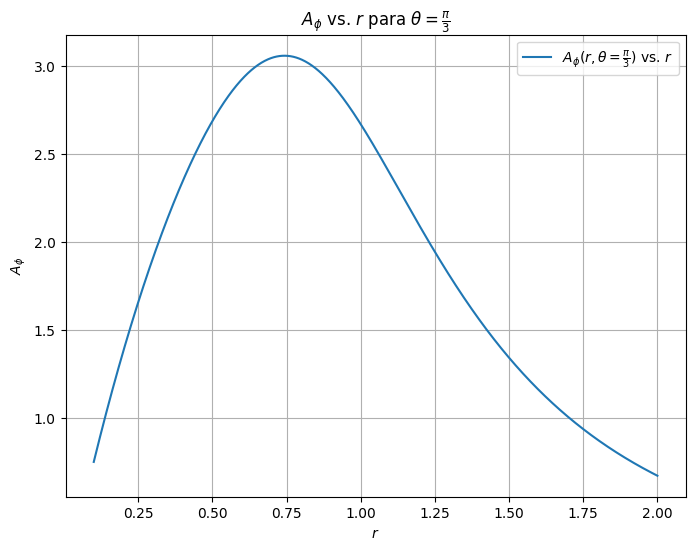

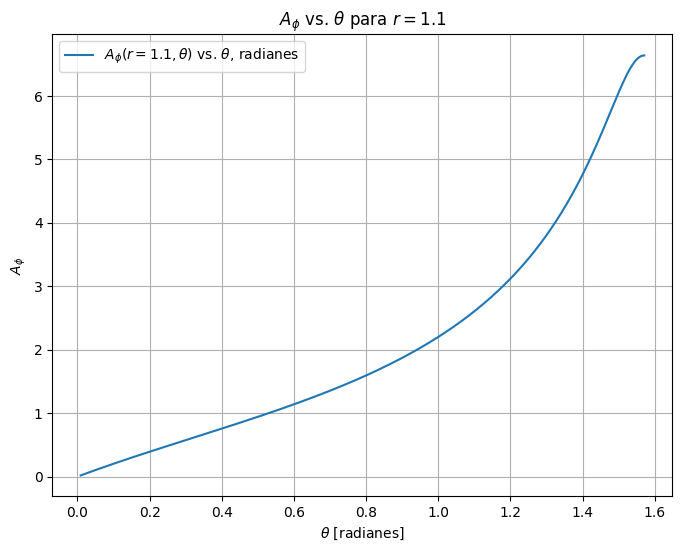

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

# Parámetros
a = 1
I = 3
uo_4pi = 1

# Funciones para calcular E, K y el potencial A_phi
def f(r,angulo,a):
    theta = np.deg2rad(angulo)
    return (4*a*r*np.sin(theta))/((a**2)+(r**2)+2*a*r*np.sin(theta))

def E(r,theta,a):
    h = lambda fi: (1-f(r,theta,a) * ((np.sin(fi))**2))**(1/2)
    return integrate.quad(h,0,np.pi/2)[0]

def K(r,theta,a):
    n = lambda fi: 1/(1-f(r,theta,a)*((np.sin(fi))**2))**(1/2)
    return integrate.quad(n,0,np.pi/2)[0]

def Apotencial(r,theta,a,I):
    j = (4*a*I)/((a**2)+(r**2)+2*a*r*np.sin(np.deg2rad(theta)))
    d = ((2-f(r,theta,a))*K(r,theta,a)-2*E(r,theta,a))/f(r,theta,a)
    return (uo_4pi*j*d)

# Vectorización de la función para permitir la evaluación en arrays
A_vectorizada = np.vectorize(Apotencial)

# Valores de r y theta para los gráficos
r = np.linspace(0.1, 2, 1000)
theta = np.linspace(0.5, 90, 1000)  # Ángulos en grados
theta_radianes = np.deg2rad(theta)  # Convertir a radianes

# Cálculo de A_phi para r = 1.1 y theta en radianes
l = A_vectorizada(1.1, theta, a, I)

# Cálculo de A_phi para theta = 60 grados y r en el rango especificado
l1 = A_vectorizada(r, 60, a, I)

# Gráfico de A_phi vs r para theta = π∕3
plt.figure(figsize=(8, 6))
plt.plot(r, l1, label=r"$A_{\phi}(r, \theta = \frac{\pi}{3})$ vs. $r$")
plt.xlabel(r"$r$")
plt.ylabel(r"$A_{\phi}$")
plt.title(r"$A_{\phi}$ vs. $r$ para $\theta = \frac{\pi}{3}$")
plt.legend()
plt.grid()
plt.show()

# Gráfico de A_phi vs theta en radianes para r = 1.1
plt.figure(figsize=(8, 6))
plt.plot(theta_radianes, l, label=r"$A_{\phi}(r = 1.1, \theta)$ vs. $\theta$, radianes")
plt.xlabel(r"$\theta$ [radianes]")
plt.ylabel(r"$A_{\phi}$")
plt.title(r"$A_{\phi}$ vs. $\theta$ para $r = 1.1$")
plt.legend()
plt.grid()
plt.show()
